In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_excel('Shop Market.xlsx')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01 00:00:00,2011-06-01 00:00:00,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01 00:00:00,2011-08-01 00:00:00,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01 00:00:00,2011-05-01 00:00:00,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01 00:00:00,2011-05-01 00:00:00,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01 00:00:00,2011-08-01 00:00:00,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [113]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

# Display Basic Information
Show the DataFrame's info, including column names, data types, and non-null counts.

In [114]:
import ydata_profiling
profile = df.profile_report(title="Shop Market Analysis Report")
profile.to_file("shop_market_analysis_report.html")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 23.80it/s]


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  int64  
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [116]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [117]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.498440,3.476545,0.142908,28.641740,26.375915,2012.777208
std,487.567175,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000


# Exploratory Data Analysis.

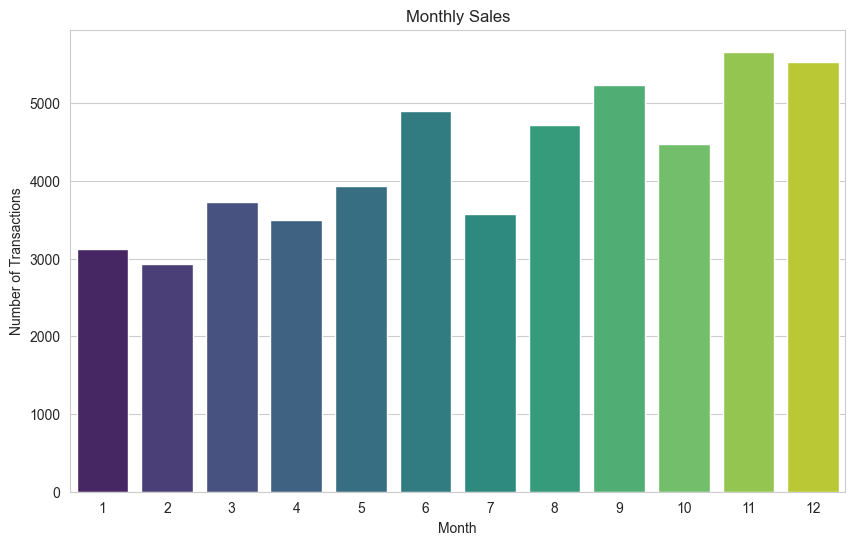

In [118]:
import warnings
warnings.filterwarnings('ignore')

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# extract the month
df['Month'] = df['order_date'].dt.month

# Visualize sales by month
monthly_sales = df.groupby('Month').size()
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

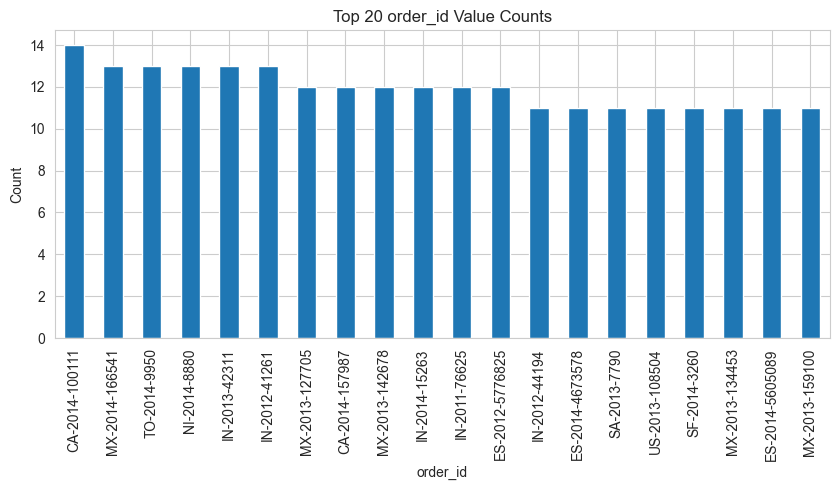

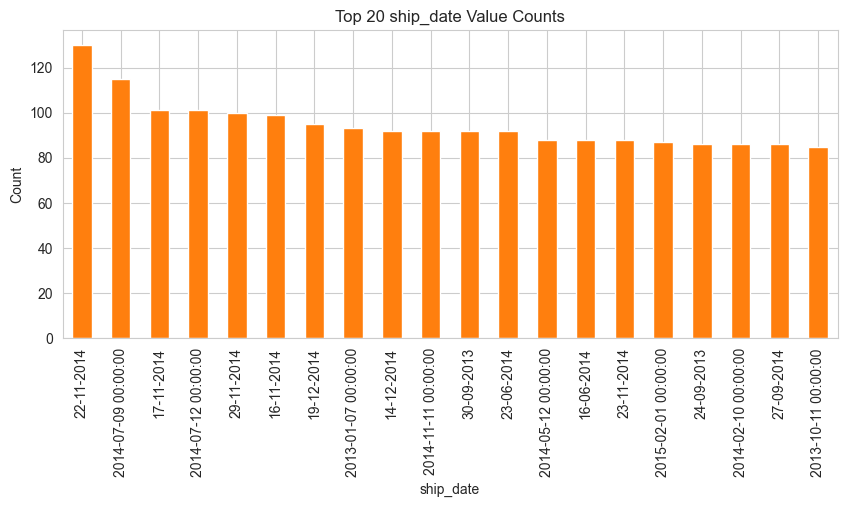

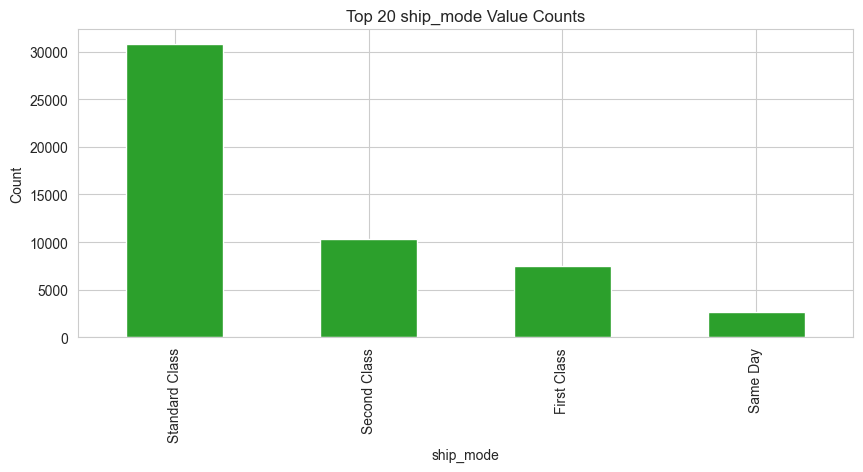

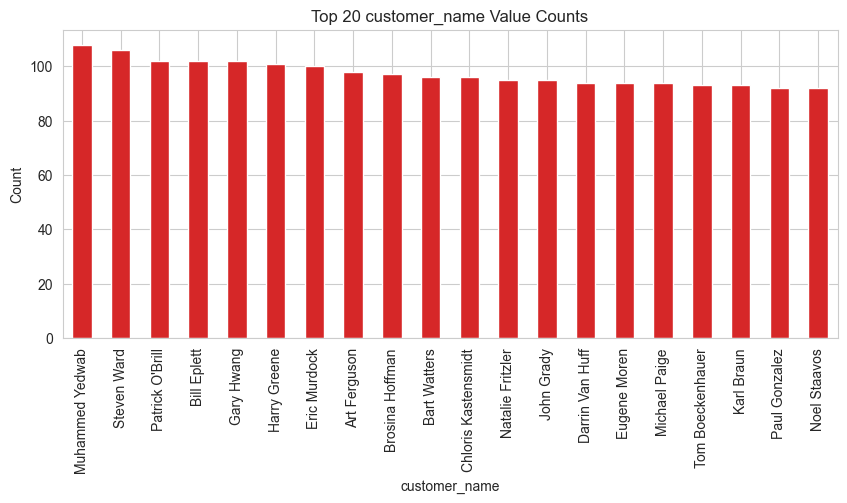

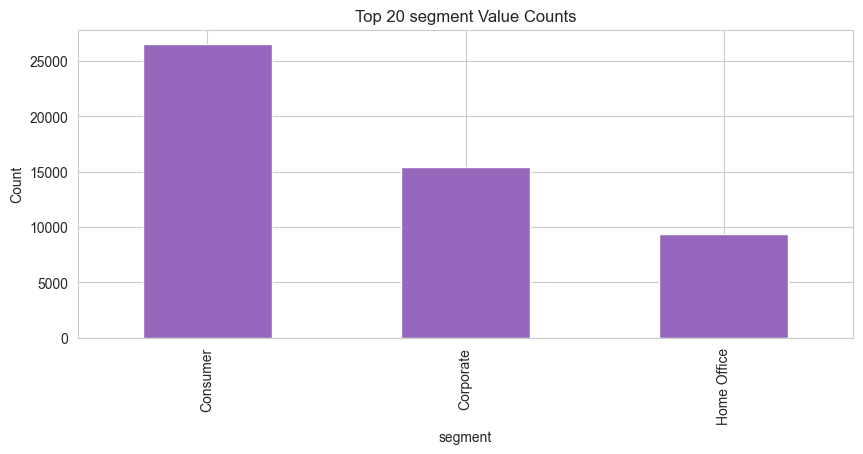

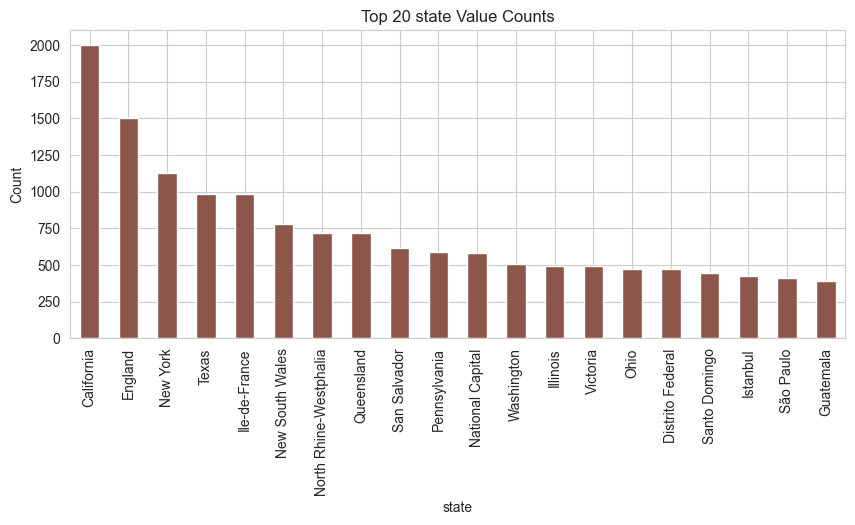

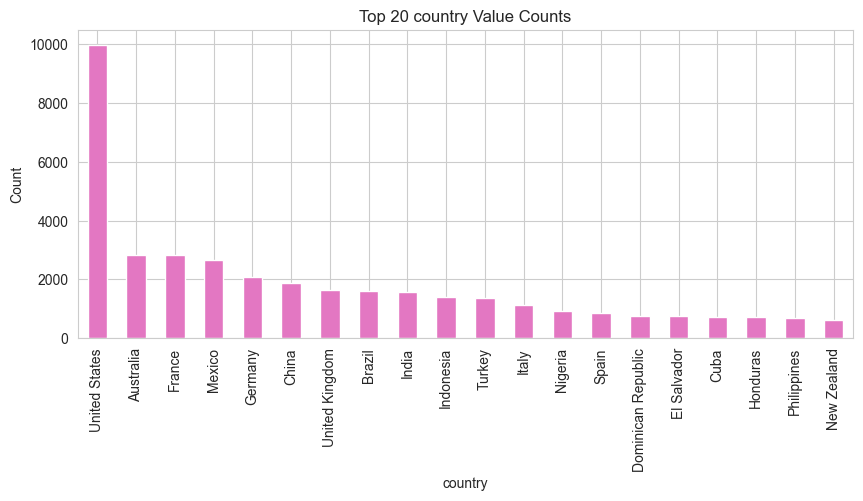

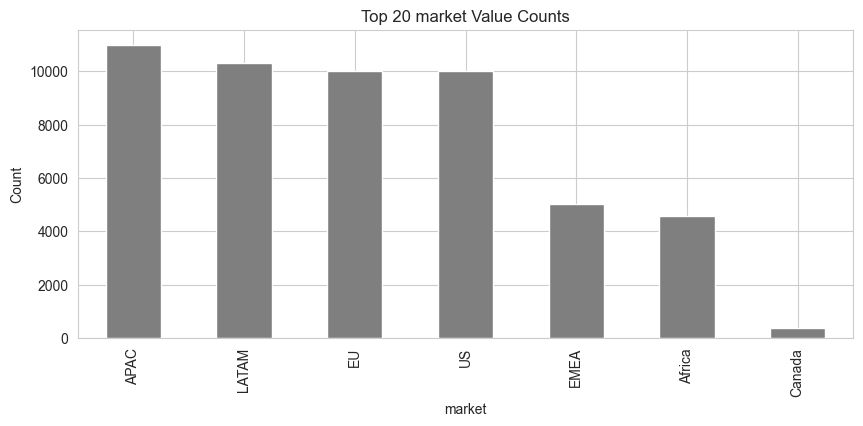

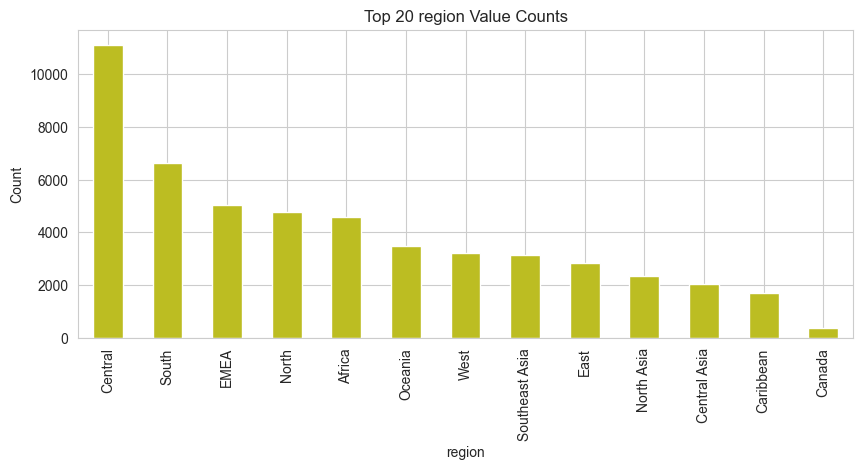

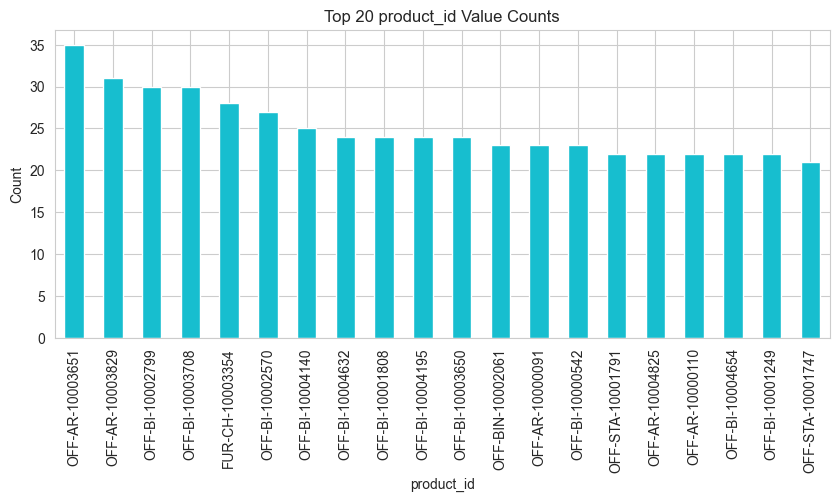

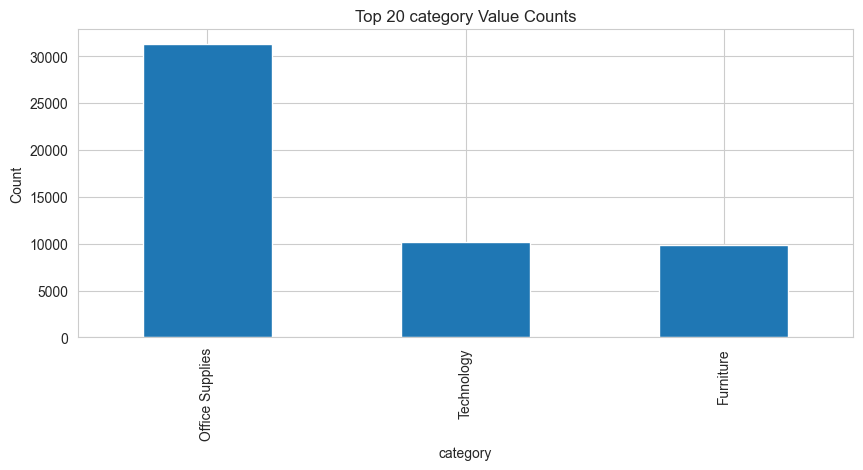

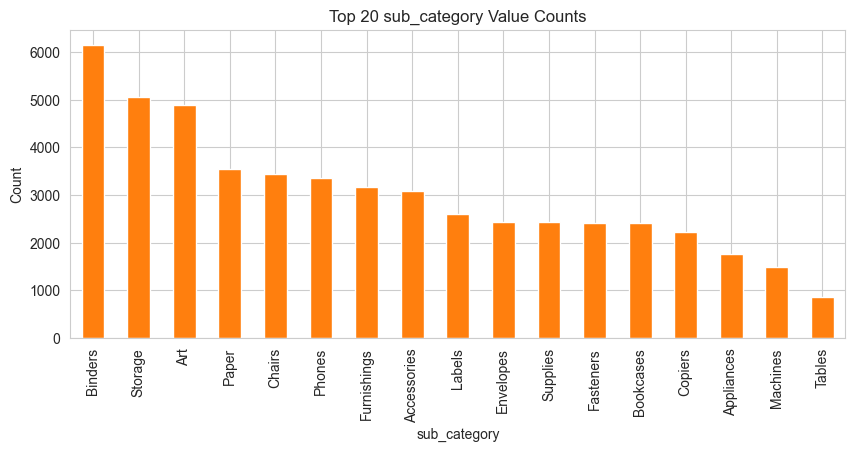

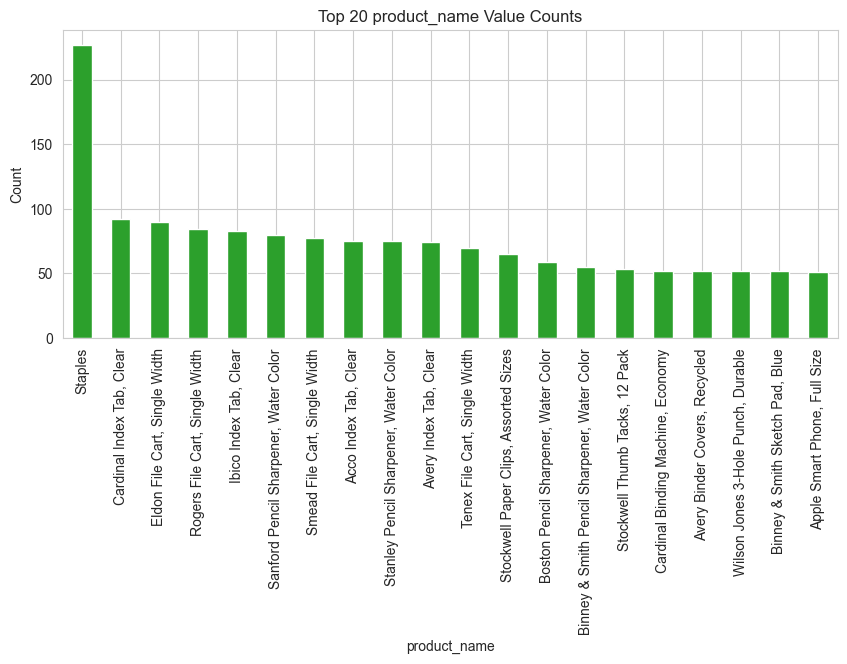

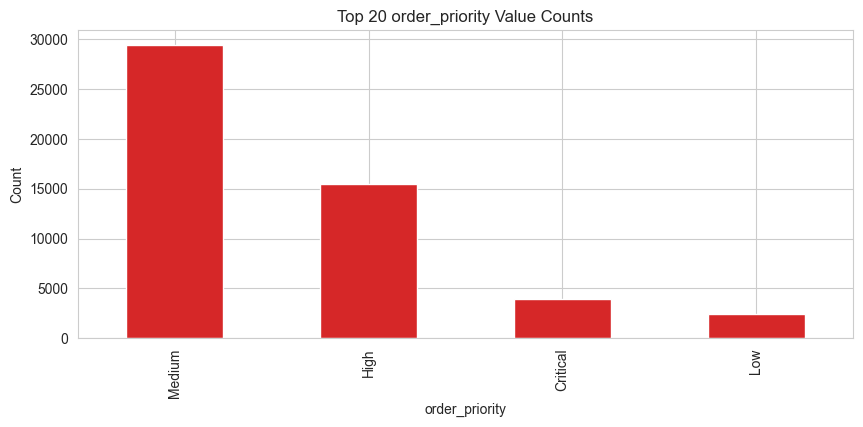

In [119]:
# Visualize categorical features
import seaborn as sns

categorical_cols = df.select_dtypes(include='object').columns
palette = sns.color_palette('tab10', len(categorical_cols))

for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(20).plot(
        kind='bar',
        color=palette[i % len(palette)]
    )
    plt.title(f'Top 20 {col} Value Counts')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()

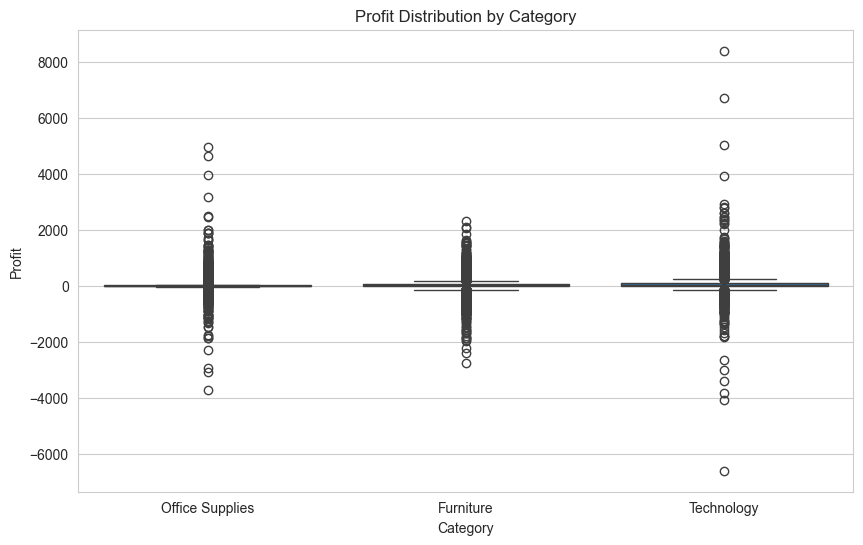

In [120]:
# visualize profit by category
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='profit', data=df)
plt.title('Profit Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

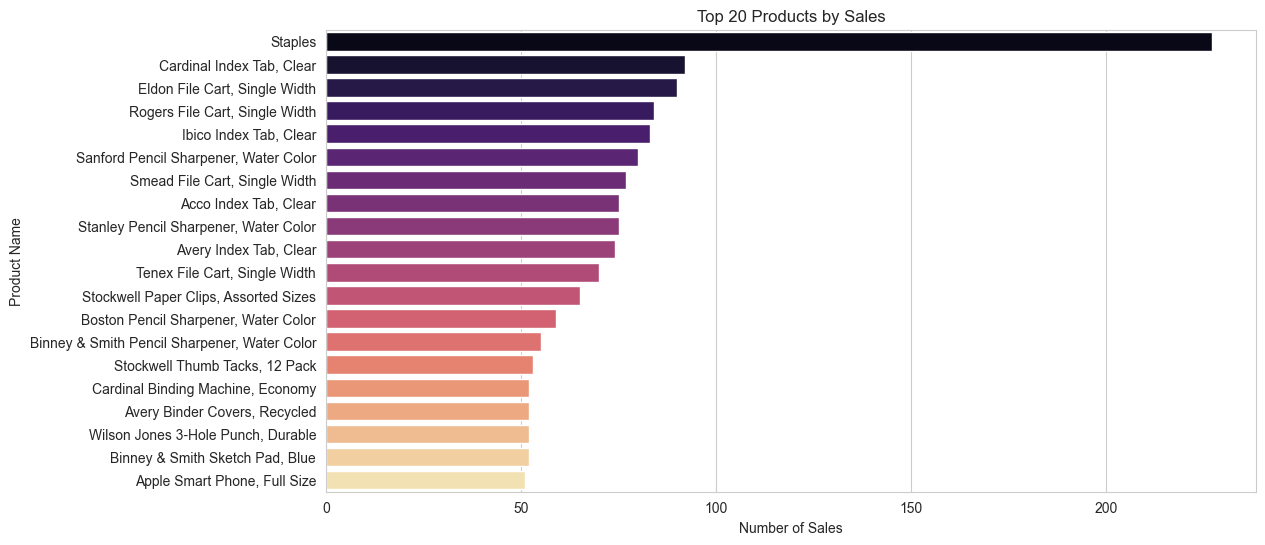

In [121]:
# visualize top 20 products by sales
top_products = df['product_name'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 20 Products by Sales')
plt.xlabel('Number of Sales')
plt.ylabel('Product Name')
plt.show()

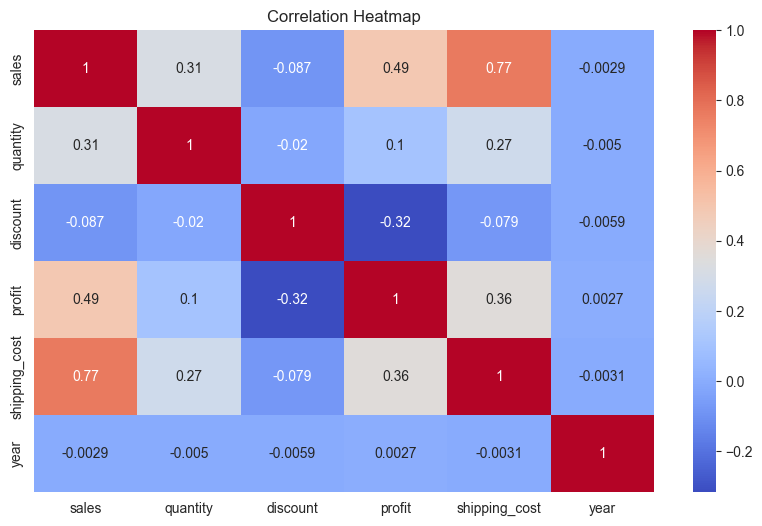

In [122]:
# correlation heatmap for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Profit Prediction

Data Pre-processing include data feature, remove outliers in profit and encoding

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_excel("Shop Market.xlsx")

# Data feature
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day

# remove outliers in profit
# Define IQR method
Q1 = df['profit'].quantile(0.25)
Q3 = df['profit'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filter
df = df[(df['profit'] >= lower) & (df['profit'] <= upper)]

# split features and target
features = [
    'ship_mode', 'segment', 'state', 'country', 'market', 'region',
    'category', 'sub_category', 'quantity', 'order_priority',
    'year', 'day', 'month'
]
target = 'profit'

X = df[features]
y = df[target]

# encoding
ordinal_cols = ['order_priority', 'ship_mode']
onehot_cols = list(set(X.select_dtypes(include='object').columns) - set(ordinal_cols))

ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, ordinal_cols),
        ('onehot', onehot_encoder, onehot_cols)
    ],
    remainder='passthrough'  # keep numeric columns
)

#### Split the dataset, set the model parameter and train the model

#### Light GBM

In [124]:
# split the dataset into training, validation, and testing
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
# 60% train, 20% val, 20% test

# model parameter
model = LGBMRegressor(
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.05,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    force_col_wise=True
)

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# train
pipe.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 867
[LightGBM] [Info] Number of data points in the train set: 24921, number of used features: 403
[LightGBM] [Info] Start training from score 12.999528


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('onehot', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Evaluate the model and ensure no overfitting

In [125]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# evaluate on training
y_val_pred = pipe.predict(X_val)
val_rmse = root_mean_squared_error(y_val_pred, y_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f"Validation RMSE: val_rmse = {val_rmse}")
print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation R²: {val_r2:.3f}")

print('---------------------')

# evaluate on testing
y_test_pred = pipe.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test RMSE: test_rmse = {test_rmse}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test R²: {test_r2:.3f}")


Validation RMSE: val_rmse = 21.099300393052644
Validation MAE: 14.98
Validation R²: 0.352
---------------------
Test RMSE: test_rmse = 20.926861660280924
Test MAE: 14.84
Test R²: 0.343


In [126]:
# Get names after transformation
preprocessor_fitted = pipe.named_steps['preprocessor']

# Ordinal features
ord_features = ordinal_cols

# One-hot features
onehot_features = preprocessor_fitted.named_transformers_['onehot'].get_feature_names_out(onehot_cols)

# Numeric passthrough columns
num_features = [c for c in X.columns if c not in ordinal_cols + onehot_cols]

# Combine all
all_feature_names = np.concatenate([ord_features, onehot_features, num_features])

#### XGBoost

In [151]:
from xgboost import XGBRegressor

# model parameter
xgb_model = XGBRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=6,
    learning_rate=0.1
)

xgb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# train
xgb_pipe.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred_xgb = xgb_pipe.predict(X_val)
val_rmse_xgb = root_mean_squared_error(y_val, y_val_pred_xgb)
val_mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
val_r2_xgb = r2_score(y_val, y_val_pred_xgb)

print('XGBoost Regressor')
print(f'Validation RMSE: {val_rmse_xgb:.2f}')
print(f'Validation MAE: {val_mae_xgb:.2f}')
print(f'Validation R²: {val_r2_xgb:.3f}')
print('---------------------')

# Evaluate on test set
y_test_pred_xgb = xgb_pipe.predict(X_test)
test_rmse_xgb = root_mean_squared_error(y_test, y_test_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print(f'Test RMSE: {test_rmse_xgb:.2f}')
print(f'Test MAE: {test_mae_xgb:.2f}')
print(f'Test R²: {test_r2_xgb:.3f}')


XGBoost Regressor
Validation RMSE: 21.74
Validation MAE: 15.25
Validation R²: 0.313
---------------------
Test RMSE: 21.46
Test MAE: 15.05
Test R²: 0.309


#### Random Forest

In [152]:
from sklearn.ensemble import RandomForestRegressor

# model parameter
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# train
rf_pipe.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred_rf = rf_pipe.predict(X_val)
val_rmse_rf = root_mean_squared_error(y_val, y_val_pred_rf)
val_mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)

print('=== Random Forest Regressor ===')
print(f'Validation RMSE: {val_rmse_rf:.2f}')
print(f'Validation MAE: {val_mae_rf:.2f}')
print(f'Validation R²: {val_r2_rf:.3f}')
print('---------------------')

# Evaluate on test set
y_test_pred_rf = rf_pipe.predict(X_test)
test_rmse_rf = root_mean_squared_error(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f'Test RMSE: {test_rmse_rf:.2f}')
print(f'Test MAE: {test_mae_rf:.2f}')
print(f'Test R²: {test_r2_rf:.3f}')

=== Random Forest Regressor ===
Validation RMSE: 23.06
Validation MAE: 16.28
Validation R²: 0.227
---------------------
Test RMSE: 22.78
Test MAE: 16.08
Test R²: 0.221


#### Cat Boost

In [154]:
from catboost import CatBoostRegressor

# model parameter
cat_model = CatBoostRegressor(iterations=300, learning_rate=0.05, depth=10, random_state=42, verbose=0)

cat_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', cat_model)
])

# train
cat_pipe.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred_cat = cat_pipe.predict(X_val)
val_rmse_cat = root_mean_squared_error(y_val, y_val_pred_cat)
val_mae_cat = mean_absolute_error(y_val, y_val_pred_cat)
val_r2_cat = r2_score(y_val, y_val_pred_cat)

print('CatBoost Regressor')
print(f'Validation RMSE: {val_rmse_cat:.2f}')
print(f'Validation MAE: {val_mae_cat:.2f}')
print(f'Validation R²: {val_r2_cat:.3f}')
print('---------------------')

# Evaluate on test set
y_test_pred_cat = cat_pipe.predict(X_test)
test_rmse_cat = root_mean_squared_error(y_test, y_test_pred_cat)
test_mae_cat = mean_absolute_error(y_test, y_test_pred_cat)
test_r2_cat = r2_score(y_test, y_test_pred_cat)

print(f'Test RMSE: {test_rmse_cat:.2f}')
print(f'Test MAE: {test_mae_cat:.2f}')
print(f'Test R²: {test_r2_cat:.3f}')

=== CatBoost Regressor ===
Validation RMSE: 21.42
Validation MAE: 15.06
Validation R²: 0.333
---------------------
Test RMSE: 21.12
Test MAE: 14.83
Test R²: 0.330


#### Model Comparison Summary

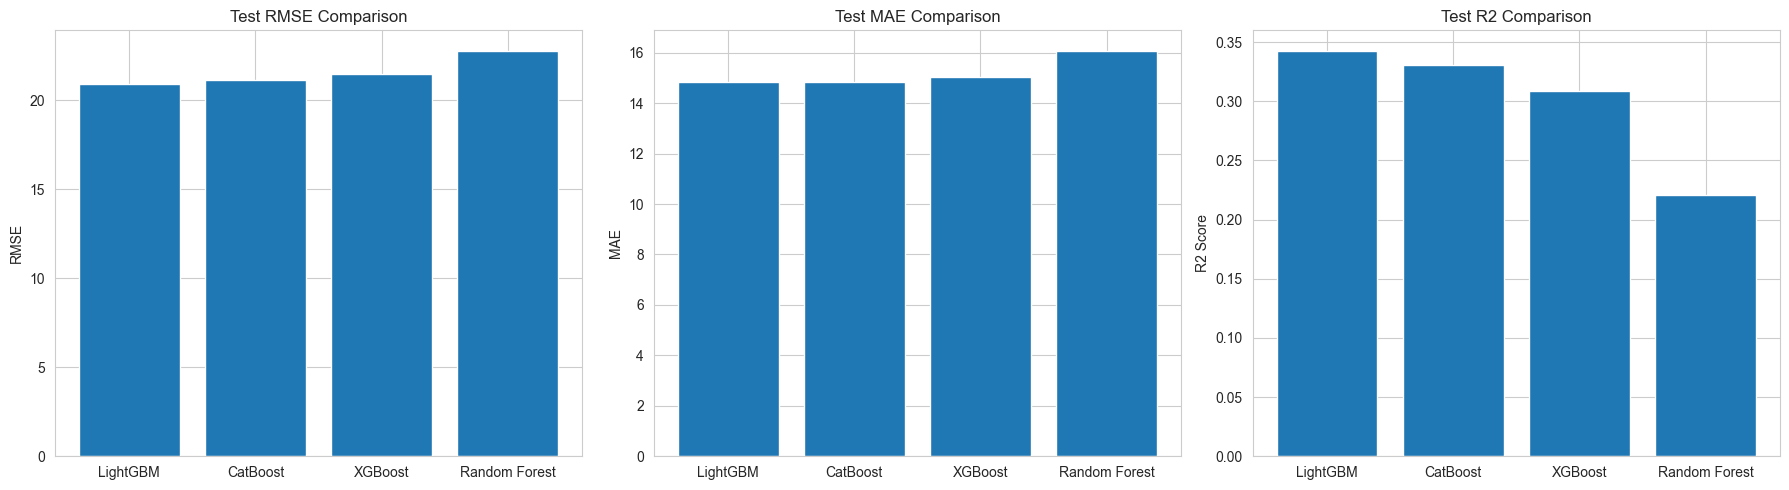

In [156]:
# Model Comparison Summary
import pandas as pd

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost', 'Random Forest', 'CatBoost'],
    'Val_RMSE': [val_rmse, val_rmse_xgb, val_rmse_rf, val_rmse_cat],
    'Val_MAE': [val_mae, val_mae_xgb, val_mae_rf, val_mae_cat],
    'Val_R2': [val_r2, val_r2_xgb, val_r2_rf, val_r2_cat],
    'Test_RMSE': [test_rmse, test_rmse_xgb, test_rmse_rf, test_rmse_cat],
    'Test_MAE': [test_mae, test_mae_xgb, test_mae_rf, test_mae_cat],
    'Test_R2': [test_r2, test_r2_xgb, test_r2_rf, test_r2_cat]
})

# Sort by Test R2 score (descending)
comparison_df = comparison_df.sort_values('Test_R2', ascending=False)

# Visualize comparison
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE Comparison
axes[0].bar(comparison_df['Model'], comparison_df['Test_RMSE'])
axes[0].set_title('Test RMSE Comparison')
axes[0].set_ylabel('RMSE')

# MAE Comparison
axes[1].bar(comparison_df['Model'], comparison_df['Test_MAE'])
axes[1].set_title('Test MAE Comparison')
axes[1].set_ylabel('MAE')

# R2 Comparison
axes[2].bar(comparison_df['Model'], comparison_df['Test_R2'])
axes[2].set_title('Test R2 Comparison')
axes[2].set_ylabel('R2 Score')

plt.tight_layout()
plt.show()


## Thank You 😊